In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [2]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from numpy.linalg import norm
from numpy.linalg import inv

In [4]:
degree = 8

X = generate_degrees(data['x_train'], degree)
y = data.y_train.values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

model = Ridge(alpha=0.8).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)

model1 = Lasso(alpha=0.8).fit(X_train, y_train)
y_pred1 = model1.predict(X_valid)
y_pred_train1 = model1.predict(X_train)

print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred1))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train1))

Качество на валидации: 0.079
Качество на обучении: 0.070
Качество на валидации: 0.093
Качество на обучении: 0.155


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7134369621139327, tolerance: 0.0024481555784964045
  positive)


In [6]:
model.coef_


array([ 4.54261785e-01,  3.41976833e-01,  3.27582091e-02, -2.07134533e-01,
        3.63216320e-02,  1.18194116e-02, -3.68031932e-03,  2.63585521e-04])

In [7]:
model1.coef_

array([-0.00000000e+00, -0.00000000e+00, -1.08299601e-02, -9.52247249e-03,
        1.03490179e-03,  1.87872250e-04,  3.38785318e-06, -2.14838285e-06])

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 8 artists>

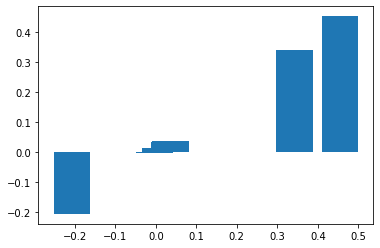

In [9]:
fig, ax = plt.subplots()
plt.bar(model.coef_, model.coef_, width =0.09 )


<BarContainer object of 8 artists>

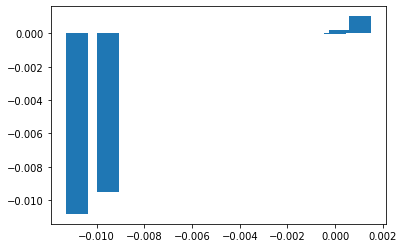

In [10]:
plt.bar(model1.coef_, model1.coef_, width =0.0009)

In [11]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
X1 = boston_dataset.data
y1 = boston_dataset.target

training_data = StandardScaler().fit_transform(X1)
training_data1= StandardScaler().fit_transform(y1.reshape(-1,1)).ravel()
X1_train, X1_test, y1_train, y1_test = train_test_split(training_data , training_data1, test_size=0.2, random_state=10)

Итарации остановлены на шаге 24


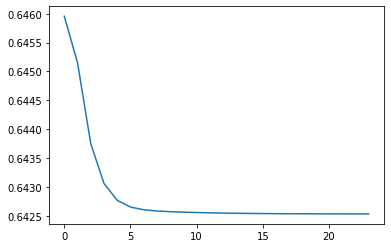

In [13]:
rmse_evolution =[]
weight_evolution = []
epsilon = 0.001
sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.01, fit_intercept=True, random_state=42)
w_current, epsilon = np.random.random(13), 0.0001
weight_evolution, rmse_evolution = [], [] # изменения весов и ошибка на валидации
for step in list(range(100)):
    sgd_regressor = sgd_regressor.partial_fit(X1_train, y1_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1]<epsilon:
        print("Итарации остановлены на шаге %d" % step); break
    rmse_evolution.append(r2_score(y1_test, sgd_regressor.predict(X1_test)))
    w_current = sgd_regressor.coef_.copy()
plt.plot(range(step), rmse_evolution)

In [14]:
rmse_evolution  # 24 шагов, ошибка :0.6425314599522971

[0.645956232042366,
 0.6451507041397683,
 0.643748902994882,
 0.6430581721554345,
 0.6427667839933029,
 0.642650546906749,
 0.6426035218561867,
 0.6425822351225511,
 0.6425703229090673,
 0.6425620628197213,
 0.6425555888817086,
 0.6425503114650082,
 0.642546010605451,
 0.6425425506876798,
 0.6425398078929032,
 0.6425376615030098,
 0.6425359992146247,
 0.6425347221702946,
 0.6425337470738975,
 0.6425330059530507,
 0.6425324446038383,
 0.6425320205128108,
 0.642531700732923,
 0.6425314599522971]